 # **Tema 4 Sección 1 Problema 12 (representación gráfica)**
 
> Una  viga  de  plástico  laminado  con  sección  transversal  cuadrada  está  construida con tres vigas pegadas, cada una de 10 mm x 30 mm de sección transversal. La viga tiene un peso total de 3.6 N y está simplemente apoyada con un alongitud de $L = 360$ mm. Considerando el peso de la viga como una carga distribuida $q$,  calcule el valor máximo del momento Mo que puede ser aplicado sobre la viga en $x=L$  si:    

- a) La tensión admisible en las juntas pegadas es de 0.3 MPa.  
- b) La tensión admisible de flexión en el plástico es de 8 MPa.  
- c) En el apartado b), calcule también la posición de la sección de la viga donde el momento flector es máximo.


APARTADO a):
El momento flector máximo aplicado en el extremo derecho, Mo, será de  72.252 Nm
para una tensión tangencial máxima admisible de  300000.0 Pa

APARTADO b) y c):
El máximo absoluto de MF se obtiene de hacer dMF/dx =0, y ocurre en xo = 2.683281572999748 m
Como xo= 2.683281572999748 (m) > L=  0.36  (m), entonces el valor máximo de MF ocurre en x=L
El valor máximo del momento aplicado en el extremo derecho, Mo, será de  36.0 Nm
para una tensión normal máxima admisible de  8000000.0 Pa


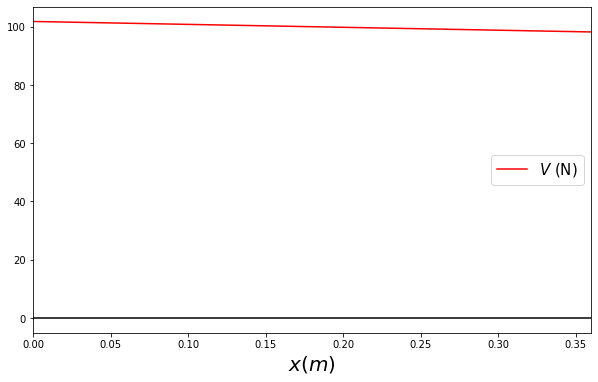

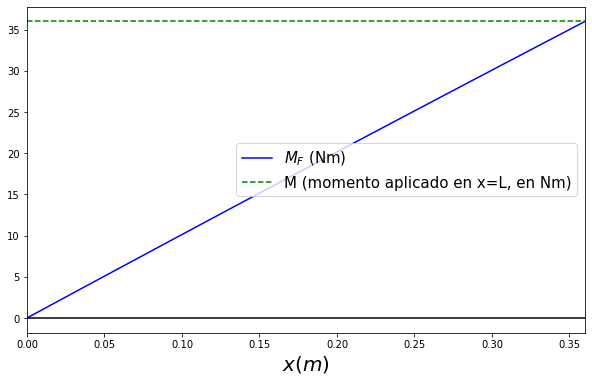

In [11]:
from sympy import *             # Librería para trabajo simbólico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas

# Datos del problema
L = 360.0e-3      # metros
b = 30.0e-3       # metros
h = 30.0e-3       # metros
peso= 3.600         # Newtons
q= peso/L         # N/m

'''
Apartado a)
'''
tau_mx_adm= 0.3e6             # Pa
Moa=3.0*b*h*tau_mx_adm*L/4.0 - q*L**2/2.0 
print("APARTADO a):")
print("El momento flector máximo aplicado en el extremo derecho, Mo, será de ",Moa,"Nm")
print("para una tensión tangencial máxima admisible de ",tau_mx_adm,"Pa")


'''
Apartado b)
'''
print("\nAPARTADO b) y c):")
sigma_mx_adm= 8.0e6             # Pa

# Suponemos que el máximo ocurre en el máximo absoluto, donde V=dM/dx es cero
Mob=-q*L**2/2 + L*math.sqrt((q*b*h**2)*sigma_mx_adm/3.0)
# Calculamos la posición del máximo
xo=(L/2)*(1+2*Mob/(q*L**2))
print("El máximo absoluto de MF se obtiene de hacer dMF/dx =0, y ocurre en xo =",xo,"m")

# Comprobamos que la posición del máximo absoluto, xo, no ocurre más allá de x=L    
if(xo>L): # En este caso, el máximo de MF ocurre en x=L
    print("Como xo=",xo,"(m) > L= ",L," (m), entonces el valor máximo de MF ocurre en x=L")
    Mob=b*h**2*sigma_mx_adm/6.0
else:    
    Mob=-q*L**2/2 + L*math.sqrt((q*b*h**2)*sigma_mx_adm/3.0)
    print("Como xo=",xo,"(m) < L= ",L," (m),, tomamos el valor de MF en xo")
   
print("El valor máximo del momento aplicado en el extremo derecho, Mo, será de ",Mob,"Nm")
print("para una tensión normal máxima admisible de ",sigma_mx_adm,"Pa")

'''
Representación gráfica de V y MF para el apartado b) (se puede ver lo que ocurre en el apartado a) cambiando la línea de abajo,
si donde ponde M=Mob, se escribe M=Moa

Notad que el momento flector en x=L deber ser igual a Mo.
'''
M=Mob
# Tramo (1)
x=symbols('x')  # x = distancia al origen               
def V1(x):        
    return  -q*x + M/L + q*L/2
def M1(x):        
    return  -q*x**2/2.0 + (M/L+q*L/2)*x

Xmin= 0.0 ; Xmax=L; nopto=100 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)
xab=np.linspace(0.0,Xmax,nopto)
xx=np.linspace(0.0,Xmax,nopto)

fab=np.zeros((nopto,1))
mab=np.zeros((nopto,1))
cero=np.zeros((nopto,1))

# Esfuerzo cortante
for i in range(0,nopto):              
    fab[i]=V1(x).subs(x,xab[i]) 
    cero[i]=0.0                             
    
fig, ax = plt.subplots(figsize=(10,6))  # Esto es como decir "Abracadabra! Hágase la figura!". 
                                        # Se genera un objeto figura que definimos a continuación
ax.plot(xab,fab, color="red", label="$V$ (N)")
ax.plot(xx,cero, color="black")
ax.set_xlabel("$x (m)$",size=20) # Nombre y unidades del eje x
ax.set_xlim(0.0,Xmax)
ax.legend(fontsize=15) # Hace que se pinte la leyenda

# Momento flector
for i in range(0,nopto):              
    fab[i]=M1(x).subs(x,xab[i]) 
    cero[i]=0.0   
    mab[i] = M
    
fig, ax = plt.subplots(figsize=(10,6))  # Esto es como decir "Abracadabra! Hágase la figura!". 
                                        # Se genera un objeto figura que definimos a continuación
ax.plot(xab,fab, color="blue", label="$M_F$ (Nm)")
ax.plot(xx,cero, color="black")
ax.plot(xx,mab, color="green",linestyle='--',label="M (momento aplicado en x=L, en Nm)")
ax.set_xlabel("$x (m)$",size=20) # Nombre y unidades del eje x
ax.set_xlim(0.0,Xmax)
ax.legend(fontsize=15) # Hace que se pinte la leyenda


